In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress
import re
#Directory from og data
file = "Clean Data.csv"
#Insert og data in a pandas DF
data = pd.read_csv(file)
data

,Title,Release Date,Language,Runtime,Revenue,Budget,Genre,Year,Month,Day,User rating,Rated,Profit
0,Avatar,2009-12-10,en,162.0,2787965087,237000000,Action,2009,12,10,7.8,PG-13,2550965087
1,Pirates of the Caribbean: At World's End,2007-05-19,en,169.0,961000000,300000000,Adventure,2007,5,19,7.1,PG-13,661000000
2,Spectre,2015-10-26,en,148.0,880674609,245000000,Action,2015,10,26,6.8,PG-13,635674609
3,The Dark Knight Rises,2012-07-16,en,165.0,1084939099,250000000,Action,2012,7,16,8.4,PG-13,834939099
4,John Carter,2012-03-07,en,132.0,284139100,260000000,Action,2012,3,7,6.6,PG-13,24139100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2929,Blue Valentine,2010-12-27,en,112.0,16566240,3500000,Drama,2010,12,27,7.4,R,7640272
2930,Beyond the Valley of the Dolls,1970-07-17,en,109.0,40000000,2090000,Comedy,1970,7,17,6.2,NC-17,19307746
2931,The Green Inferno,2014-09-04,en,100.0,6833445,5000000,Action,2014,9,4,5.3,R,7144595
2932,What Happens in Vegas,2008-05-07,da,99.0,170000000,35000000,Comedy,2008,5,7,6.1,PG-13,5000000


In [34]:
bins = [0,1970,1980,1990,2000,2010,2020]
labels = ["60's","70's","80's","90's","2000's","2010's"]
data["Decade"] = pd.cut(data["Year"],bins,labels=labels)
data

,Title,Release Date,Language,Runtime,Revenue,Budget,Genre,Year,Month,Day,User rating,Rated,Profit,Decade
0,Avatar,2009-12-10,en,162.0,2787965087,237000000,Action,2009,12,10,7.8,PG-13,2550965087,2000's
1,Pirates of the Caribbean: At World's End,2007-05-19,en,169.0,961000000,300000000,Adventure,2007,5,19,7.1,PG-13,661000000,2000's
2,Spectre,2015-10-26,en,148.0,880674609,245000000,Action,2015,10,26,6.8,PG-13,635674609,2010's
3,The Dark Knight Rises,2012-07-16,en,165.0,1084939099,250000000,Action,2012,7,16,8.4,PG-13,834939099,2010's
4,John Carter,2012-03-07,en,132.0,284139100,260000000,Action,2012,3,7,6.6,PG-13,24139100,2010's
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2929,Blue Valentine,2010-12-27,en,112.0,16566240,3500000,Drama,2010,12,27,7.4,R,7640272,2000's
2930,Beyond the Valley of the Dolls,1970-07-17,en,109.0,40000000,2090000,Comedy,1970,7,17,6.2,NC-17,19307746,60's
2931,The Green Inferno,2014-09-04,en,100.0,6833445,5000000,Action,2014,9,4,5.3,R,7144595,2010's
2932,What Happens in Vegas,2008-05-07,da,99.0,170000000,35000000,Comedy,2008,5,7,6.1,PG-13,5000000,2000's


In [35]:
data_group = data.groupby("Genre")
data_size = (data_group["Decade"].count())
data_size

Genre
Action         569
Adventure      270
Animation       95
Comedy         585
Crime          128
Documentary     16
Drama          631
Family          38
Fantasy         88
History         15
Horror         174
Music           16
Mystery         25
No Genre         1
Romance         65
Science         75
Thriller       111
War             15
Western         17
Name: Decade, dtype: int64

In [36]:
count_totals = data["Decade"].value_counts()
count_totals

2000's    1288
2010's     732
90's       581
80's       202
70's        74
60's        57
Name: Decade, dtype: int64

In [37]:
#Creating dataframe for decades for further ploting
decades=data.groupby(data.Decade)
year1=decades.get_group("60's")
year2=decades.get_group("70's")
year3=decades.get_group("80's")
year4=decades.get_group("90's")
year5=decades.get_group("2000's")
year6=decades.get_group("2010's")

In [38]:
#60s decade dataframe
year1.head()

,Title,Release Date,Language,Runtime,Revenue,Budget,Genre,Year,Month,Day,User rating,Rated,Profit,Decade
813,Lolita,1962-06-13,en,153.0,9250000,2000000,Drama,1962,6,13,7.6,Not Rated,7250000,60's
1045,Cleopatra,1963-06-12,en,248.0,71000000,31115000,Drama,1963,6,12,7.0,G,115674180,60's
1658,Tora! Tora! Tora!,1970-01-26,en,144.0,29548291,25485000,History,1970,1,26,7.5,G,25671850,60's
1711,Waterloo,1970-10-26,en,128.0,3052000,25000000,History,1970,10,26,7.3,G,46009334,60's
1858,Paint Your Wagon,1969-10-15,en,158.0,31678778,20000000,Drama,1969,10,15,6.6,PG-13,58378744,60's


In [39]:
year1_df = year1["Genre"].value_counts()
year1_df

Drama        18
Action       11
Adventure     7
Western       5
Comedy        5
Crime         3
History       3
Science       2
Mystery       1
War           1
Horror        1
Name: Genre, dtype: int64

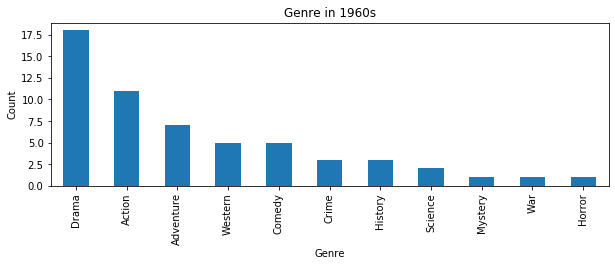

<Figure size 432x288 with 0 Axes>

In [40]:
year1_df.plot(kind="bar", title="Genre in 1960s", figsize=(10,3))
plt.ylabel("Count")
plt.xlabel("Genre")
plt.show()
plt.tight_layout()

In [41]:
#70s dataframe
year2.head()

,Title,Release Date,Language,Runtime,Revenue,Budget,Genre,Year,Month,Day,User rating,Rated,Profit,Decade
770,Superman,1978-12-13,en,143.0,300218018,55000000,Action,1978,12,13,7.3,PG,245218018,70's
821,Superman II,1980-12-04,en,127.0,190458706,54000000,Action,1980,12,4,6.8,PG,136458706,70's
1030,Heaven's Gate,1980-11-19,en,219.0,3484331,44000000,Action,1980,11,19,6.8,R,81700000,70's
1246,Star Trek: The Motion Picture,1979-12-06,en,132.0,139000000,35000000,Science,1979,12,6,6.4,G,291551094,70's
1277,The Bad News Bears,1976-04-07,en,102.0,35323292,35000000,Comedy,1976,4,7,7.3,PG,24901913,70's


In [42]:
year2_df = year2["Genre"].value_counts()
year2_df

Comedy       14
Drama        14
Action       12
Adventure    10
Horror        8
Crime         4
Western       4
Science       4
Romance       2
Music         1
Family        1
Name: Genre, dtype: int64

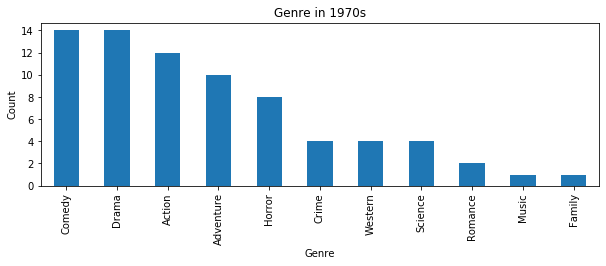

<Figure size 432x288 with 0 Axes>

In [43]:
year2_df.plot(kind="bar", title="Genre in 1970s", figsize=(10,3))
plt.ylabel("Count")
plt.xlabel("Genre")
plt.show()
plt.tight_layout()

In [44]:
#80s dataframe
year3.head()

,Title,Release Date,Language,Runtime,Revenue,Budget,Genre,Year,Month,Day,User rating,Rated,Profit,Decade
205,Total Recall,1990-06-01,en,113.0,261317921,65000000,Action,1990,6,1,7.5,R,196317921,80's
372,Conan the Barbarian,1982-04-02,en,129.0,79114085,20000000,Adventure,1982,4,2,6.9,R,59114085,80's
408,Creepshow,1982-11-12,en,120.0,21028755,8000000,Horror,1982,11,12,6.9,R,13028755,80's
552,Die Hard 2,1990-07-02,en,124.0,240031094,70000000,Action,1990,7,2,7.2,R,170031094,80's
565,The Abyss,1989-08-09,en,139.0,90000098,70000000,Adventure,1989,8,9,7.6,PG-13,20000098,80's


In [45]:
year3_df = year3["Genre"].value_counts()
year3_df

Action       40
Drama        36
Horror       30
Adventure    30
Comedy       30
Science      10
Fantasy       9
Crime         8
Music         2
Romance       2
Family        2
Animation     1
Thriller      1
War           1
Name: Genre, dtype: int64

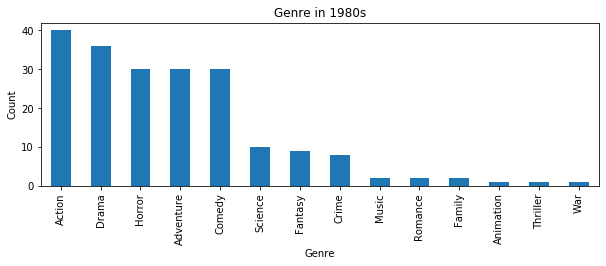

<Figure size 432x288 with 0 Axes>

In [46]:
year3_df.plot(kind="bar", title="Genre in 1980s", figsize=(10,3))
plt.ylabel("Count")
plt.xlabel("Genre")
plt.show()
plt.tight_layout()

In [47]:
#90s dataframe
year4.head()

,Title,Release Date,Language,Runtime,Revenue,Budget,Genre,Year,Month,Day,User rating,Rated,Profit,Decade
25,Titanic,1997-11-18,en,194.0,1845034188,200000000,Drama,1997,11,18,7.8,PG-13,1645034188,90's
70,Wild Wild West,1999-06-29,en,106.0,222104681,170000000,Action,1999,6,29,4.9,PG-13,52104681,90's
75,Waterworld,1995-07-28,en,135.0,264218220,175000000,Adventure,1995,7,28,6.2,PG-13,89218220,90's
147,Armageddon,1998-07-01,en,151.0,553799566,140000000,Action,1998,7,1,6.7,PG-13,413799566,90's
162,Lethal Weapon 4,1998-07-10,en,127.0,285444603,140000000,Action,1998,7,10,6.6,R,145444603,90's


In [48]:
year4_df = year4["Genre"].value_counts()
year4_df

Drama        127
Action       118
Comedy       116
Adventure     49
Crime         38
Horror        28
Fantasy       21
Thriller      20
Science       16
Romance       16
Animation     15
Mystery        6
Family         5
Music          2
History        2
War            1
Western        1
Name: Genre, dtype: int64

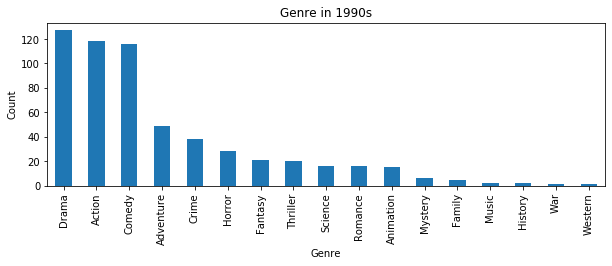

<Figure size 432x288 with 0 Axes>

In [49]:
year4_df.plot(kind="bar", title="Genre in 1990s", figsize=(10,3))
plt.ylabel("Count")
plt.xlabel("Genre")
plt.show()
plt.tight_layout()

In [50]:
#2000s dataframe
year5.head()

,Title,Release Date,Language,Runtime,Revenue,Budget,Genre,Year,Month,Day,User rating,Rated,Profit,Decade
0,Avatar,2009-12-10,en,162.0,2787965087,237000000,Action,2009,12,10,7.8,PG-13,2550965087,2000's
1,Pirates of the Caribbean: At World's End,2007-05-19,en,169.0,961000000,300000000,Adventure,2007,5,19,7.1,PG-13,661000000,2000's
5,Spider-Man 3,2007-05-01,en,139.0,890871626,258000000,Fantasy,2007,5,1,6.2,PG-13,632871626,2000's
6,Tangled,2010-11-24,en,100.0,591794936,260000000,Animation,2010,11,24,7.7,PG,331794936,2000's
8,Harry Potter and the Half-Blood Prince,2009-07-07,en,153.0,933959197,250000000,Adventure,2009,7,7,7.6,PG,683959197,2000's


In [51]:
year5_df = year5["Genre"].value_counts()
year5_df

Drama          296
Comedy         290
Action         229
Adventure      124
Horror          66
Crime           44
Thriller        43
Animation       41
Fantasy         38
Romance         27
Science         21
Family          18
Mystery         14
Documentary     12
War              7
Music            7
Western          5
History          5
No Genre         1
Name: Genre, dtype: int64

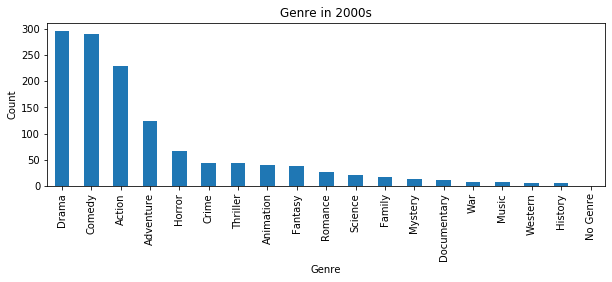

<Figure size 432x288 with 0 Axes>

In [52]:
year5_df.plot(kind="bar", title="Genre in 2000s", figsize=(10,3))
plt.ylabel("Count")
plt.xlabel("Genre")
plt.show()
plt.tight_layout()

In [53]:
#2010s dataframe
year6.head()

,Title,Release Date,Language,Runtime,Revenue,Budget,Genre,Year,Month,Day,User rating,Rated,Profit,Decade
2,Spectre,2015-10-26,en,148.0,880674609,245000000,Action,2015,10,26,6.8,PG-13,635674609,2010's
3,The Dark Knight Rises,2012-07-16,en,165.0,1084939099,250000000,Action,2012,7,16,8.4,PG-13,834939099,2010's
4,John Carter,2012-03-07,en,132.0,284139100,260000000,Action,2012,3,7,6.6,PG-13,24139100,2010's
7,Avengers: Age of Ultron,2015-04-22,en,141.0,1405403694,280000000,Action,2015,4,22,7.3,PG-13,1125403694,2010's
9,Batman v Superman: Dawn of Justice,2016-03-23,en,151.0,873260194,250000000,Action,2016,3,23,6.5,PG-13,623260194,2010's


In [54]:
year6_df = year6["Genre"].value_counts()
year6_df

Action         159
Drama          140
Comedy         130
Adventure       50
Thriller        47
Horror          41
Animation       38
Crime           31
Science         22
Fantasy         20
Romance         18
Family          12
History          5
War              5
Documentary      4
Mystery          4
Music            4
Western          2
Name: Genre, dtype: int64

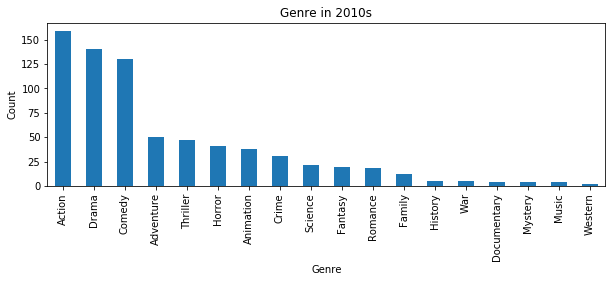

<Figure size 432x288 with 0 Axes>

In [55]:
year6_df.plot(kind="bar", title="Genre in 2010s", figsize=(10,3))
plt.ylabel("Count")
plt.xlabel("Genre")
plt.show()
plt.tight_layout()

In [56]:
#dataframe for analyzing Genre Vs Runtime
df_1 = data.loc[:, ["Title", "Genre", "Runtime"]]
df_1

,Title,Genre,Runtime
0,Avatar,Action,162.0
1,Pirates of the Caribbean: At World's End,Adventure,169.0
2,Spectre,Action,148.0
3,The Dark Knight Rises,Action,165.0
4,John Carter,Action,132.0
...,...,...,...
2929,Blue Valentine,Drama,112.0
2930,Beyond the Valley of the Dolls,Comedy,109.0
2931,The Green Inferno,Action,100.0
2932,What Happens in Vegas,Comedy,99.0


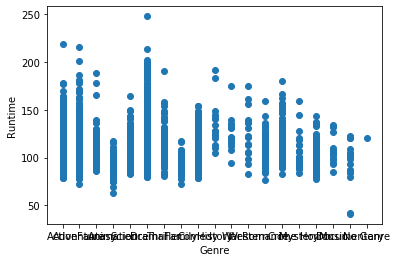

In [57]:
x_values = df_1['Genre']
y_values = df_1['Runtime']
plt.scatter(x_values,y_values)
plt.xlabel('Genre')
plt.ylabel('Runtime')
plt.show()

In [61]:
Genre=df_1['Genre']
Runtime=df_1['Runtime']
correlation =st.pearsonr(Genre,Runtime)
print(f"The correlation between both factors is {round(correlation[0],2)}")

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [ ]:
#dataframe for analyzing genre vs budget
df_2=data.loc[:, ["Title", "Genre", "Budget"]]
df_2

In [ ]:
#dataframe for analyzing genre vs profit
df_3=data.loc[:,["Title","Genre","Profit"]]
df_3

In [ ]:
df_4=data.loc[:,["Title","Genre","User rating"]]
df_4

In [ ]:
df_5=data.loc[:,["Title","Genre","User rating","Budget"]]
df_5